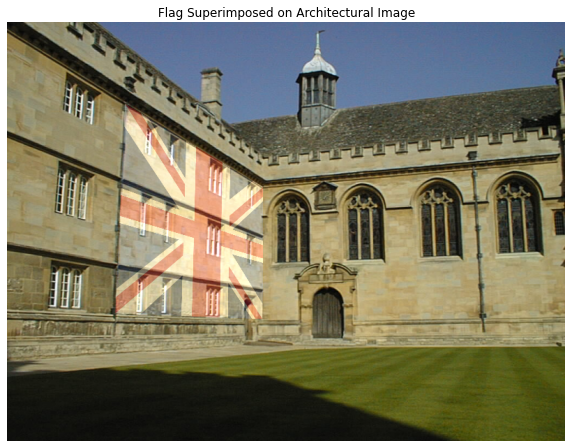

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (architectural image and flag image)
architecture_img = cv2.imread('Resources/architecture.jpg')
flag_img = cv2.imread('Resources/flag.png')

# Resize flag for better fitting if needed (optional)
flag_img = cv2.resize(flag_img, (800, 600)) # adjust size as needed
architecture_img = cv2.resize(architecture_img, (800, 600))

# Function to click points on the image
clicked_points = []
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))
        cv2.circle(architecture_img_copy, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)

# Create a copy of the image to display clicks
architecture_img_copy = architecture_img.copy()
cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)
cv2.setMouseCallback('Select 4 points on the architectural image', click_event)

# Wait until 4 points are clicked
while len(clicked_points) < 4:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# These are the points selected on the architectural image
pts_dst = np.array(clicked_points, dtype=np.float32)

# Define 4 corners of the flag image (assuming the full image is used)
h, w, _ = flag_img.shape
pts_src = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# Compute the homography matrix
H, status = cv2.findHomography(pts_src, pts_dst)

# Warp the flag image to fit onto the architectural image
warped_flag = cv2.warpPerspective(flag_img, H, (architecture_img.shape[1], architecture_img.shape[0]))

# Combine the warped flag and the architectural image
result = cv2.addWeighted(architecture_img, 1, warped_flag, 0.3, 0)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Flag Superimposed on Architectural Image')
plt.axis('off')
plt.show()



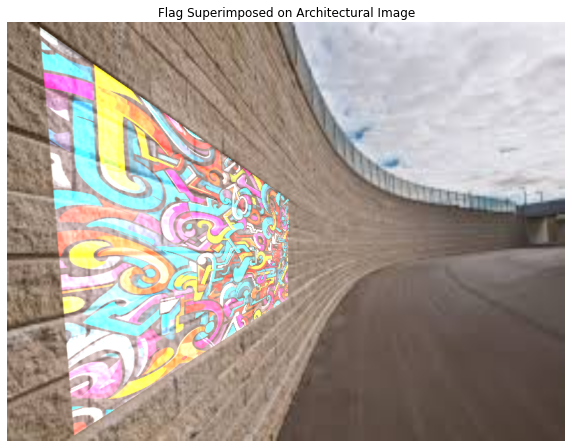

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (architectural image and flag image)
architecture_img = cv2.imread('Resources/wall.jpeg')
flag_img = cv2.imread('Resources/graffiti.png')

# Resize flag for better fitting if needed (optional)
flag_img = cv2.resize(flag_img, (800, 600)) # adjust size as needed
architecture_img = cv2.resize(architecture_img, (800, 600))

# Function to click points on the image
clicked_points = []
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))
        cv2.circle(architecture_img_copy, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)

# Create a copy of the image to display clicks
architecture_img_copy = architecture_img.copy()
cv2.imshow('Select 4 points on the architectural image', architecture_img_copy)
cv2.setMouseCallback('Select 4 points on the architectural image', click_event)

# Wait until 4 points are clicked
while len(clicked_points) < 4:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# These are the points selected on the architectural image
pts_dst = np.array(clicked_points, dtype=np.float32)

# Define 4 corners of the flag image (assuming the full image is used)
h, w, _ = flag_img.shape
pts_src = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# Compute the homography matrix
H, status = cv2.findHomography(pts_src, pts_dst)

# Warp the flag image to fit onto the architectural image
warped_flag = cv2.warpPerspective(flag_img, H, (architecture_img.shape[1], architecture_img.shape[0]))

# Combine the warped flag and the architectural image
result = cv2.addWeighted(architecture_img, 1, warped_flag, 1, 0)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Flag Superimposed on Architectural Image')
plt.axis('off')
plt.show()